Importing Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

Reading Data

In [4]:
data = pd.read_csv('raw_house_data.csv')

Drop Duplicates

In [5]:
data = data.drop_duplicates()

Drop Columns

In [6]:
data.drop('MLS', axis=1, inplace=True)

In [7]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [8]:
data.isnull().sum()


sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64

As most of the Columns are skewed , we are using median to fill the null values

In [9]:
data['lot_acres'] = data['lot_acres'].fillna(data['lot_acres'].median())
median = data['lot_acres'].median()
data['lot_acres'] = data['lot_acres'].replace(0, median)

In [10]:
median_year = data['year_built'].median()
data['year_built'] = data['year_built'].replace(0, median_year)

In [11]:
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

In [12]:
data['sqrt_ft'] = data['sqrt_ft'].fillna(data['sqrt_ft'].median())

In [13]:
data['garage'] = data['garage'].fillna(data['garage'].median())

In [14]:
data['HOA'] = pd.to_numeric(data['HOA'], errors='coerce')
median_HOA = data['HOA'].median()
data['HOA'] = data['HOA'].replace(np.nan,median_HOA)

In [15]:
data['kitchen_features'] = data['kitchen_features'].fillna('unknown')
data['floor_covering'] = data['floor_covering'].fillna('unknown')

In [16]:
data.isnull().sum()

sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [17]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0


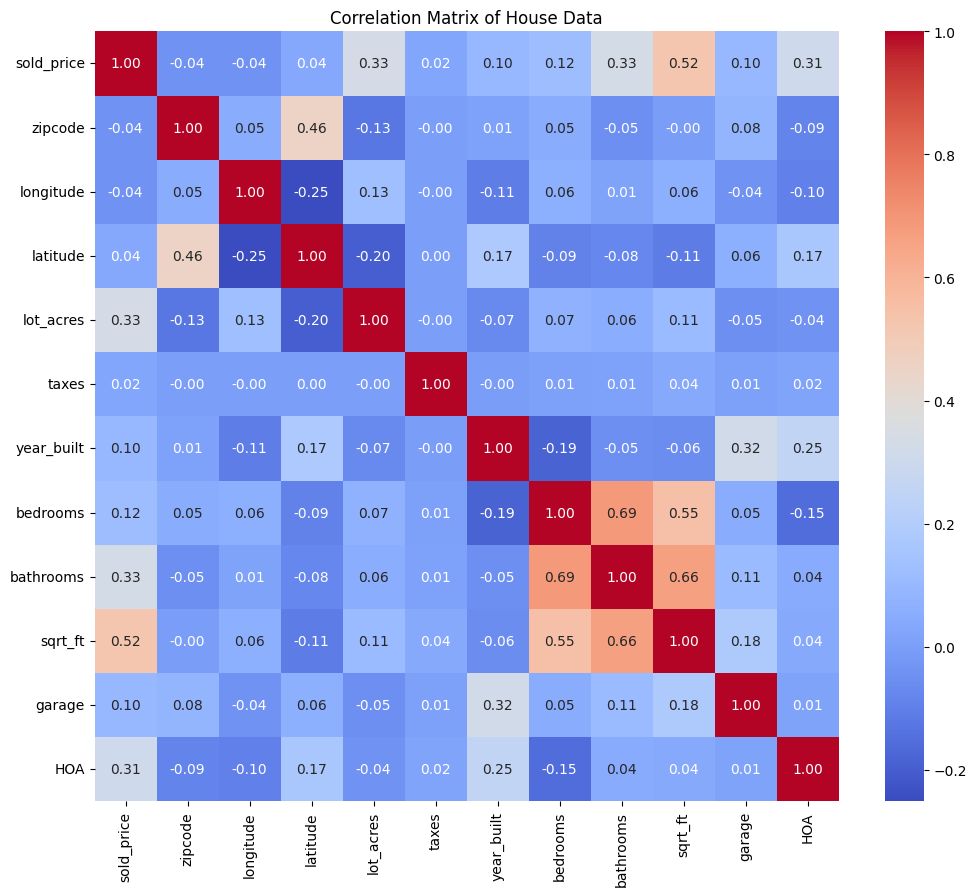

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of House Data')
plt.show()

Feature Engineering

Adding few more columns would make the model understand better an dpredict better . I am adding three columns

In [19]:
data["num_kitchen_features"] = data["kitchen_features"].apply(lambda x: len(str(x).split(",")))


In [20]:
data["bed_bath_ratio"] = data["bedrooms"] / (data["bathrooms"] + 1e-6)
data["house_age"] = 2025 - data["year_built"]

Converting the Fireplace to Bianry

In [21]:
print(data['fireplaces'].unique())

['6' '5' '4' '1' '2' '3' '7' '0' '9' ' ' '8']


In [22]:
def fireplace_to_binary(x):
    try:
        x_float = float(x)
        return 0 if x_float == 0 else 1
    except:
        s = str(x).strip().lower()
        if s in ["none", "no", "nan", "0", ""]:
            return 0
        return 1

data["fireplaces"] = data["fireplaces"].apply(fireplace_to_binary)


In [23]:

data.drop('kitchen_features', axis=1, inplace=True)


In [24]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,floor_covering,HOA,num_kitchen_features,bed_bath_ratio,house_age
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,1,"Mexican Tile, Wood",0.0,4,1.300000,84
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,1,"Natural Stone, Other",0.0,2,1.000000,28
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,1,"Natural Stone, Other: Rock",55.0,3,0.666666,28
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,1,"Ceramic Tile, Laminate, Wood",55.0,4,1.400000,95
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,1,"Carpet, Concrete",55.0,5,0.666667,30


Removing Outliers in sold_price

When I tried to remove outliers, beyond Q3 , I am losing around 800 samples. So iam just removing top 1% of them

In [25]:
q99 = data["sold_price"].quantile(0.99)
data = data[data["sold_price"] < q99].copy()

In [26]:
data.shape

(4947, 17)

Spliting the Data and Normalizing the data

In [27]:
target = "sold_price"

numeric_features = [
    "zipcode", "longitude", "latitude", "lot_acres", "taxes",
    "year_built", "bedrooms", "bathrooms", "sqrt_ft",
    "garage", "HOA",
    "num_kitchen_features", "bed_bath_ratio", "house_age"
]

categorical_features = ["floor_covering"]

X_num_df = data[numeric_features]
X_cat_df = data[categorical_features]
y = data[target].to_numpy().astype(float)

Test Train Split

In [28]:
def train_test_split_manual(N, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(N)
    test_n = int(N * test_size)
    test_idx = indices[:test_n]
    train_idx = indices[test_n:]
    return train_idx, test_idx

N = len(data)
train_idx, test_idx = train_test_split_manual(N, test_size=0.2, seed=42)

X_num_train = X_num_df.iloc[train_idx].to_numpy().astype(float)
X_num_test  = X_num_df.iloc[test_idx].to_numpy().astype(float)

X_cat_train = X_cat_df.iloc[train_idx]
X_cat_test  = X_cat_df.iloc[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

Scaling

In [29]:
num_mean = X_num_train.mean(axis=0)
num_std  = X_num_train.std(axis=0)
num_std[num_std == 0] = 1.0

X_num_train_scaled = (X_num_train - num_mean) / num_std
X_num_test_scaled  = (X_num_test  - num_mean) / num_std

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

One Hot Encoding

In [ ]:
def split_tokens(x):
    """Split comma-separated values into clean tokens."""
    if pd.isna(x):
        return []
    return [item.strip() for item in str(x).split(",")]

data["floor_list"] = data["floor_covering"].apply(split_tokens)


In [ ]:

all_floor_tokens = sorted({
    t for lst in data["floor_list"] for t in lst
})

print("Floor tokens:", len(all_floor_tokens))


Floor tokens: 124


In [ ]:

for token in all_floor_tokens:
    data[f"floor_{token}"] = data["floor_list"].apply(lambda lst: int(token in lst))


/tmp/ipython-input-903644850.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"floor_{token}"] = data["floor_list"].apply(lambda lst: int(token in lst))
/tmp/ipython-input-903644850.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"floor_{token}"] = data["floor_list"].apply(lambda lst: int(token in lst))
/tmp/ipython-input-903644850.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [ ]:
print(categorical_features)

['floor_covering']


In [ ]:
data = data.drop(columns=[ "floor_covering", "floor_list"])


In [ ]:
categorical_features = [col for col in data.columns if col.startswith("floor_")]
numeric_features = [
    "zipcode", "longitude", "latitude", "lot_acres", "taxes",
    "year_built", "bedrooms", "bathrooms", "sqrt_ft",
    "garage", "HOA",
    "num_kitchen_features", "bed_bath_ratio", "house_age"
]


In [ ]:
X_cat_train_encoded = data.iloc[train_idx][categorical_features].to_numpy().astype(float)
X_cat_test_encoded  = data.iloc[test_idx][categorical_features].to_numpy().astype(float)

print("Categorical (encoded) train shape:", X_cat_train_encoded.shape)
print("Categorical (encoded) test shape:", X_cat_test_encoded.shape)

Categorical (encoded) train shape: (3958, 124)
Categorical (encoded) test shape: (989, 124)


In [ ]:
X_train_final = np.hstack([X_num_train_scaled, X_cat_train_encoded])
X_test_final  = np.hstack([X_num_test_scaled,  X_cat_test_encoded])

X_train_design = np.hstack([np.ones((X_train_final.shape[0], 1)), X_train_final])
X_test_design  = np.hstack([np.ones((X_test_final.shape[0], 1)),  X_test_final])

print("Design matrix shape (train):", X_train_design.shape)


Design matrix shape (train): (3958, 139)


In [ ]:
def OLS(Y, Y_hat, N):
  return np.sum((Y_hat - Y)**2) / N

class MVLinearRegression():
  def fit(self,X,y,eta=1e-3,epochs=1e-3,show_curve=True):
    epochs=int(epochs)
    N,D = X.shape
    Y=y
    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)
    #Start Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]=OLS(Y,Y_hat,N)
      #weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("Cost ($\\mathcal{J}$)")
  def predict(self,X):
    return X@self.W

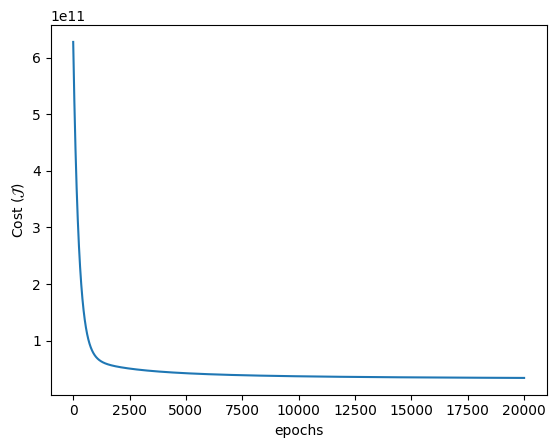

In [ ]:
my_reg = MVLinearRegression()
my_reg.fit(X_train_design, y_train, eta=1e-3, epochs=20000, show_curve=True)

In [ ]:
y_pred = my_reg.predict(X_test_design)

In [ ]:
def MAE(Y, Y_hat):
    return np.mean(np.abs(Y - Y_hat))

def R2(Y, Y_hat):
    return 1 - (np.sum((Y - Y_hat)**2) / np.sum((Y - np.mean(Y))**2))

def OLS(Y, Y_hat):
    N = len(Y)
    return (1/(2*N)) * np.sum((Y - Y_hat)**2)


In [ ]:
y_pred = my_reg.predict(X_test_design)

mae = MAE(y_test, y_pred)
r2 = R2(y_test, y_pred)
ols_loss = OLS(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"OLS Loss: {ols_loss:.2f}")

Mean Absolute Error (MAE): 132824.73
R-squared (R2): 0.46
OLS Loss: 18684826225.71


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_final)
X_test_poly  = poly.transform(X_test_final)

print("After polynomial expansion:", X_train_poly.shape)

After polynomial expansion: (3958, 9729)


In [ ]:
def OLS(Y, Y_hat, N):
  return np.sum((Y_hat - Y)**2) / N

class MVLinearRegression2():
  def fit(self,X,y,eta=1e-3,epochs=1e-3,show_curve=True):
    epochs=int(epochs)
    N,D = X.shape
    Y=y
    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)
    #Start Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch]=OLS(Y,Y_hat,N)
      #weights update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("Cost ($\\mathcal{J}$)")
  def predict(self,X):
    return X@self.W

In [ ]:

X_train_design = np.hstack([np.ones((X_train_poly.shape[0],1)), X_train_poly])
X_test_design  = np.hstack([np.ones((X_test_poly.shape[0],1)),  X_test_poly])

# Train
model = MVLinearRegression2()
model.fit(X_train_design, y_train, eta=1e-4, epochs=20000, show_curve=True)

# Predict
y_pred = model.predict(X_test_design)

# Metrics
print("MAE:", MAE(y_test, y_pred))
print("R²:", R2(y_test, y_pred))


## Improved Modeling with Pipelines

We can reuse the engineered features above, keep preprocessing inside a `ColumnTransformer`, and benchmark a few stronger scikit-learn estimators on the same train/test split to see which one delivers the lowest error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
categorical_features = [col for col in data.columns if col.startswith("floor_")]
numeric_features = [
    "zipcode", "longitude", "latitude", "lot_acres", "taxes",
    "year_built", "bedrooms", "bathrooms", "sqrt_ft",
    "garage", "HOA",
    "num_kitchen_features", "bed_bath_ratio", "house_age"
]
if "fireplaces" in data.columns and "fireplaces" not in numeric_features:
    numeric_features = numeric_features + ["fireplaces"]

feature_cols = numeric_features + categorical_features

X = data[feature_cols].copy()
y = data[target].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", "passthrough", categorical_features)
])

models = {
    "RidgeCV": RidgeCV(alphas=(0.1, 1.0, 10.0, 100.0), cv=5),
    "LassoCV": LassoCV(cv=5, random_state=42, max_iter=5000),
    "HistGradientBoosting": HistGradientBoostingRegressor(
        random_state=42,
        learning_rate=0.05,
        max_depth=6,
        min_samples_leaf=15
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1,
        min_samples_leaf=2
    )
}

results = []
fitted_models = {}
for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    results.append({
        "model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    })
    fitted_models[name] = pipe

results_df = (
    pd.DataFrame(results)
      .sort_values(by="MAE")
      .reset_index(drop=True)
)
results_df

In [ ]:
best_model_name = results_df.loc[0, "model"]
best_model = fitted_models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"Best model: {best_model_name}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):,.0f}")
print(f"R2:  {r2_score(y_test, y_pred_best):.3f}")

if best_model_name == "HistGradientBoosting":
    gb = best_model.named_steps["model"]
    feature_names = numeric_features + categorical_features
    feature_importance = (
        pd.DataFrame({
            "feature": feature_names,
            "importance": gb.feature_importances_
        })
        .sort_values("importance", ascending=False)
        .head(10)
    )
    feature_importance